In [7]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

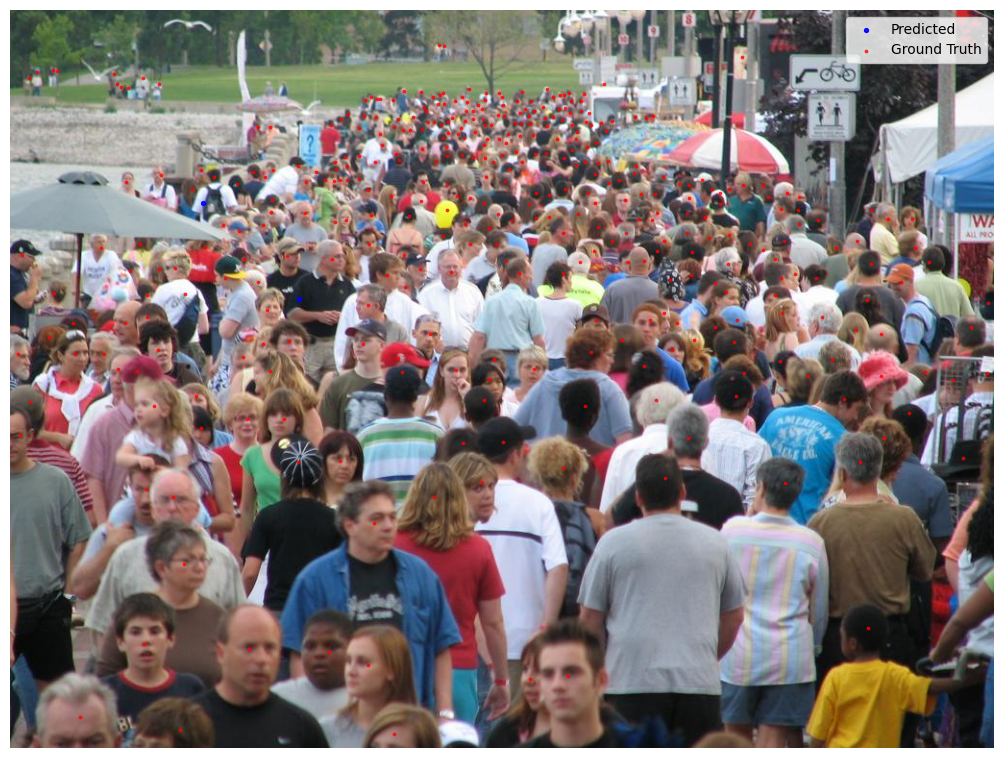

In [35]:
def show_predicted(part, split, number, predicted_locations = np.array([[200, 200], [300, 300]])):
    if part not in ['A', 'B']:
        raise ValueError("part must be either 'A' or 'B'")
    if split not in ['train', 'test']:
        raise ValueError("split must be either 'train' or 'test'")
    
    try:
        img = imread(f'../data/ShanghaiTech/part_{part}/{split}_data/images/IMG_{str(number)}.jpg')
        mat_data = scipy.io.loadmat(f'../data/ShanghaiTech/part_{part}/{split}_data/ground_truth/GT_IMG_{str(number)}.mat')
    except FileNotFoundError:
        print(f"File not found: ../data/ShanghaiTech/part_{part}/{split}_data/images/IMG_{str(number)}.jpg")
        return None
    
    locations = mat_data['image_info'][0, 0]['location'][0, 0]
    fig, ax = plt.subplots(figsize=(img.shape[1] / 100, img.shape[0] / 100), dpi=100)

    ax.imshow(img)
    ax.axis('off')


    if predicted_locations is not None:
        plt.scatter(predicted_locations[:, 0], predicted_locations[:, 1], s=8, c='blue', alpha=0.9)
    plt.scatter(locations[:, 0], locations[:, 1], s=3, c='red', alpha=0.7)
    plt.legend(['Predicted', 'Ground Truth'], loc='upper right')

    plt.tight_layout()
    plt.show()

show_predicted('A', 'train', 300, np.array([(200, 200), (300, 300)]))
